In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplhep as hep
import ast

In [2]:
plt.style.use([hep.style.ROOT, hep.style.firamath])
hep.rcParams.label.data = True
hep.rcParams.label.paper = False

## Read file

In [3]:
folder = '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/'

In [4]:
list_of_files = glob("/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/*.csv")

In [5]:
list_of_files

['/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_1.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_10.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_11.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_12.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_13.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_14.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_15.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_16.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_17.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias

In [6]:
df = pd.read_csv(list_of_files[0])
df.head()

,fromrun,fromlumi,hname,fromrun.1,fromlumi.1,metype,hname.1,histo,entries,Xmax,Xmin,Xbins,Ymax,Ymin,Ybins
0,315267,25,goodvtxNbr,315267,25,3,goodvtxNbr,"[0, 172, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3...",1320,79.5,-0.5,80,1,0,1
1,315267,25,adc_PXLayer_1,315267,25,3,adc_PXLayer_1,"[0, 30803, 9244, 13189, 30145, 52645, 115479, ...",14501527,255.5,-0.5,32,1,0,1
2,315267,25,adc_PXLayer_2,315267,25,3,adc_PXLayer_2,"[0, 4033, 33056, 78962, 273512, 425046, 656418...",8983394,255.5,-0.5,32,1,0,1
3,315267,25,adc_PXLayer_3,315267,25,3,adc_PXLayer_3,"[0, 794, 17299, 50925, 221719, 365101, 605099,...",7290760,255.5,-0.5,32,1,0,1
4,315267,25,adc_PXLayer_4,315267,25,3,adc_PXLayer_4,"[0, 932, 3478, 14132, 94487, 221275, 478996, 3...",5938130,255.5,-0.5,32,1,0,1


### Extracting analysed histogram from all files

In [7]:
monitoring_elements = ['chargeInner_PXLayer_1',
                       'chargeInner_PXLayer_2',
                       'chargeInner_PXLayer_3',
                       'chargeInner_PXLayer_4',
                       'size_PXLayer_1',
                       'size_PXLayer_2',
                       'size_PXLayer_3',
                       'size_PXLayer_4']                      

In [8]:
essential_columns = ['fromrun','fromlumi','hname','histo','Xmin','Xmax','Xbins','entries']

In [9]:
def extract_histo(df,histo_name):
    sub_df = df.copy()
    sub_df = sub_df[sub_df.hname == histo_name]
    sub_df = sub_df[essential_columns]
    return sub_df
    

In [10]:
df_all_files = pd.DataFrame(columns=essential_columns)
for file in list_of_files[:2]:
    df = pd.read_csv(file)
    for me in monitoring_elements : 
        df_all_files = pd.concat([df_all_files,extract_histo(df,me)])
    

In [11]:
df_all_files['histo_list'] = df_all_files['histo'].apply(lambda x : ast.literal_eval(x))

In [12]:
df_all_files.sort_values(by=["fromrun", "fromlumi"], inplace=True)
df_all_files.reset_index(inplace=True, drop=True)
df_all_files.head(10)

,fromrun,fromlumi,hname,histo,Xmin,Xmax,Xbins,entries,histo_list
0,315257,31,chargeInner_PXLayer_1,"[0, 107, 321, 469, 506, 544, 578, 646, 679, 74...",0.0,80000.0,100,153846,"[0, 107, 321, 469, 506, 544, 578, 646, 679, 74..."
1,315257,31,chargeInner_PXLayer_2,"[0, 0, 23, 67, 112, 128, 189, 198, 228, 283, 2...",0.0,80000.0,100,114641,"[0, 0, 23, 67, 112, 128, 189, 198, 228, 283, 2..."
2,315257,31,chargeInner_PXLayer_3,"[0, 0, 0, 18, 43, 55, 67, 86, 69, 77, 101, 77,...",0.0,80000.0,100,93181,"[0, 0, 0, 18, 43, 55, 67, 86, 69, 77, 101, 77,..."
3,315257,31,chargeInner_PXLayer_4,"[0, 0, 0, 6, 35, 33, 44, 44, 42, 42, 48, 44, 5...",0.0,80000.0,100,77970,"[0, 0, 0, 6, 35, 33, 44, 44, 42, 42, 48, 44, 5..."
4,315257,31,size_PXLayer_1,"[0, 0, 31516, 59502, 43030, 28586, 21533, 1753...",0.0,30.0,30,293210,"[0, 0, 31516, 59502, 43030, 28586, 21533, 1753..."
5,315257,31,size_PXLayer_2,"[0, 0, 13673, 47871, 47000, 32252, 23047, 1765...",0.0,30.0,30,218536,"[0, 0, 13673, 47871, 47000, 32252, 23047, 1765..."
6,315257,31,size_PXLayer_3,"[0, 0, 5475, 41455, 52794, 37882, 24274, 13562...",0.0,30.0,30,183545,"[0, 0, 5475, 41455, 52794, 37882, 24274, 13562..."
7,315257,31,size_PXLayer_4,"[0, 0, 5979, 40968, 52565, 34572, 13393, 2855,...",0.0,30.0,30,152628,"[0, 0, 5979, 40968, 52565, 34572, 13393, 2855,..."
8,315257,34,chargeInner_PXLayer_1,"[0, 123, 371, 481, 492, 608, 586, 648, 730, 83...",0.0,80000.0,100,162270,"[0, 123, 371, 481, 492, 608, 586, 648, 730, 83..."
9,315257,34,chargeInner_PXLayer_2,"[0, 2, 18, 66, 113, 157, 212, 193, 229, 272, 2...",0.0,80000.0,100,121292,"[0, 2, 18, 66, 113, 157, 212, 193, 229, 272, 2..."


### Histogram display

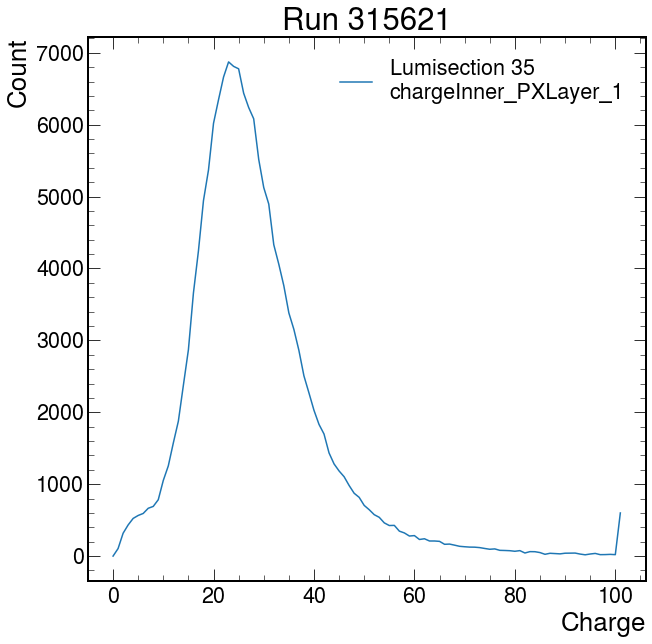

In [13]:
display_data = df_all_files[df_all_files.hname == 'chargeInner_PXLayer_1'][['histo_list','fromlumi','hname']]
#print(display_data)
plt.plot(display_data['histo_list'].get(16),label = 'Lumisection '+str(display_data['fromlumi'][16])+'\n'+display_data['hname'][16])
plt.ylabel('Count')
plt.xlabel('Charge')
plt.title('Run 315621')
plt.legend()

### Calculate mean of the histogram

In [14]:
run = 316569

df_run = df_all_files[df_all_files.fromrun == run]
    
#reduced_df = df_run[['fromlumi', 'hname','histo_list']]
#reduced_df = reduced_df.pivot(columns = 'hname',index = 'fromlumi')
#reduced_df.head()

#df_run['iter_val'] = (df_run['Xmax'] - df_run['Xmin'])/df_run['Xbins']
mean_list = []
for index,row in df_run.iterrows():
    mean_val = 0
    histo_list = row['histo_list']
    Xbins = row['Xbins']
    entries = row['entries']
    if entries == 0 :
        mean_val = 0 
    else :    
        for i in range(1,len(histo_list)-1):
            mean_val += histo_list[i]*i/(row['entries']-histo_list[0]-histo_list[1])
    mean_list.append(mean_val)
    """
    iter_var = row['iter_val']
    min_var = row['Xmin']
    max_var = row['Xmax']
    bin_elements = np.arange(min_var,max_var+iter_var,iter_var)
    for i in range(1,len(histo_list)-1):
        mean_val += histo_list[i]*bin_elements[i]/sum(histo_list)         """
    #mean_list.append(mean_val) 
    #print(histo_list[len(histo_list)-2])
    #print(bin_elements[len(histo_list)-2])
    #print(sum(histo_list[1:-1]))
    #print(min_var)
    #print(max_var)
    #print(iter_var)
    #print(bin_elements)
#print(mean_list)
df_run['mean'] = mean_list
#df_run = df_run.drop(['Xmin','Xmax'],axis=1)
df_run

/tmp/ipykernel_1312/658436010.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run['mean'] = mean_list


,fromrun,fromlumi,hname,histo,Xmin,Xmax,Xbins,entries,histo_list,mean
5920,316569,62,chargeInner_PXLayer_1,"[0, 316, 1610, 2637, 3391, 3926, 4290, 4378, 4...",0.0,80000.0,100,198935,"[0, 316, 1610, 2637, 3391, 3926, 4290, 4378, 4...",22.246759
5921,316569,62,chargeInner_PXLayer_2,"[0, 0, 63, 190, 320, 420, 511, 492, 541, 589, ...",0.0,80000.0,100,171008,"[0, 0, 63, 190, 320, 420, 511, 492, 541, 589, ...",26.005637
5922,316569,62,chargeInner_PXLayer_3,"[0, 0, 3, 42, 92, 148, 154, 155, 169, 170, 196...",0.0,80000.0,100,132087,"[0, 0, 3, 42, 92, 148, 154, 155, 169, 170, 196...",28.708571
5923,316569,62,chargeInner_PXLayer_4,"[0, 0, 0, 12, 44, 81, 87, 98, 95, 104, 105, 11...",0.0,80000.0,100,106333,"[0, 0, 0, 12, 44, 81, 87, 98, 95, 104, 105, 11...",29.450133
5924,316569,62,size_PXLayer_1,"[0, 0, 64314, 94598, 60397, 41929, 29392, 2387...",0.0,30.0,30,397950,"[0, 0, 64314, 94598, 60397, 41929, 29392, 2387...",5.367029
...,...,...,...,...,...,...,...,...,...,...
7995,316569,1953,chargeInner_PXLayer_4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,80000.0,100,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
7996,316569,1953,size_PXLayer_1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,30.0,30,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
7997,316569,1953,size_PXLayer_2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,30.0,30,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
7998,316569,1953,size_PXLayer_3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,30.0,30,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000


In [15]:
mean = df_run.pivot_table(index=['fromlumi'],columns='hname')['mean']
mean.head()

hname,chargeInner_PXLayer_1,chargeInner_PXLayer_2,chargeInner_PXLayer_3,chargeInner_PXLayer_4,size_PXLayer_1,size_PXLayer_2,size_PXLayer_3,size_PXLayer_4
fromlumi,,,,,,,,
62,22.246759,26.005637,28.708571,29.450133,5.367029,5.158553,4.626463,4.199579
63,22.554640,26.022496,28.640928,29.404989,5.430803,5.152193,4.624281,4.200295
64,22.809993,26.010143,28.732448,29.464191,5.502565,5.152102,4.624814,4.206559
65,24.088520,25.973728,28.613171,29.368736,5.726570,5.165226,4.630343,4.198447
66,22.968884,26.040310,28.652381,29.378297,5.497172,5.159370,4.627416,4.209213


Text(0.5, 1.0, 'Run 316569')

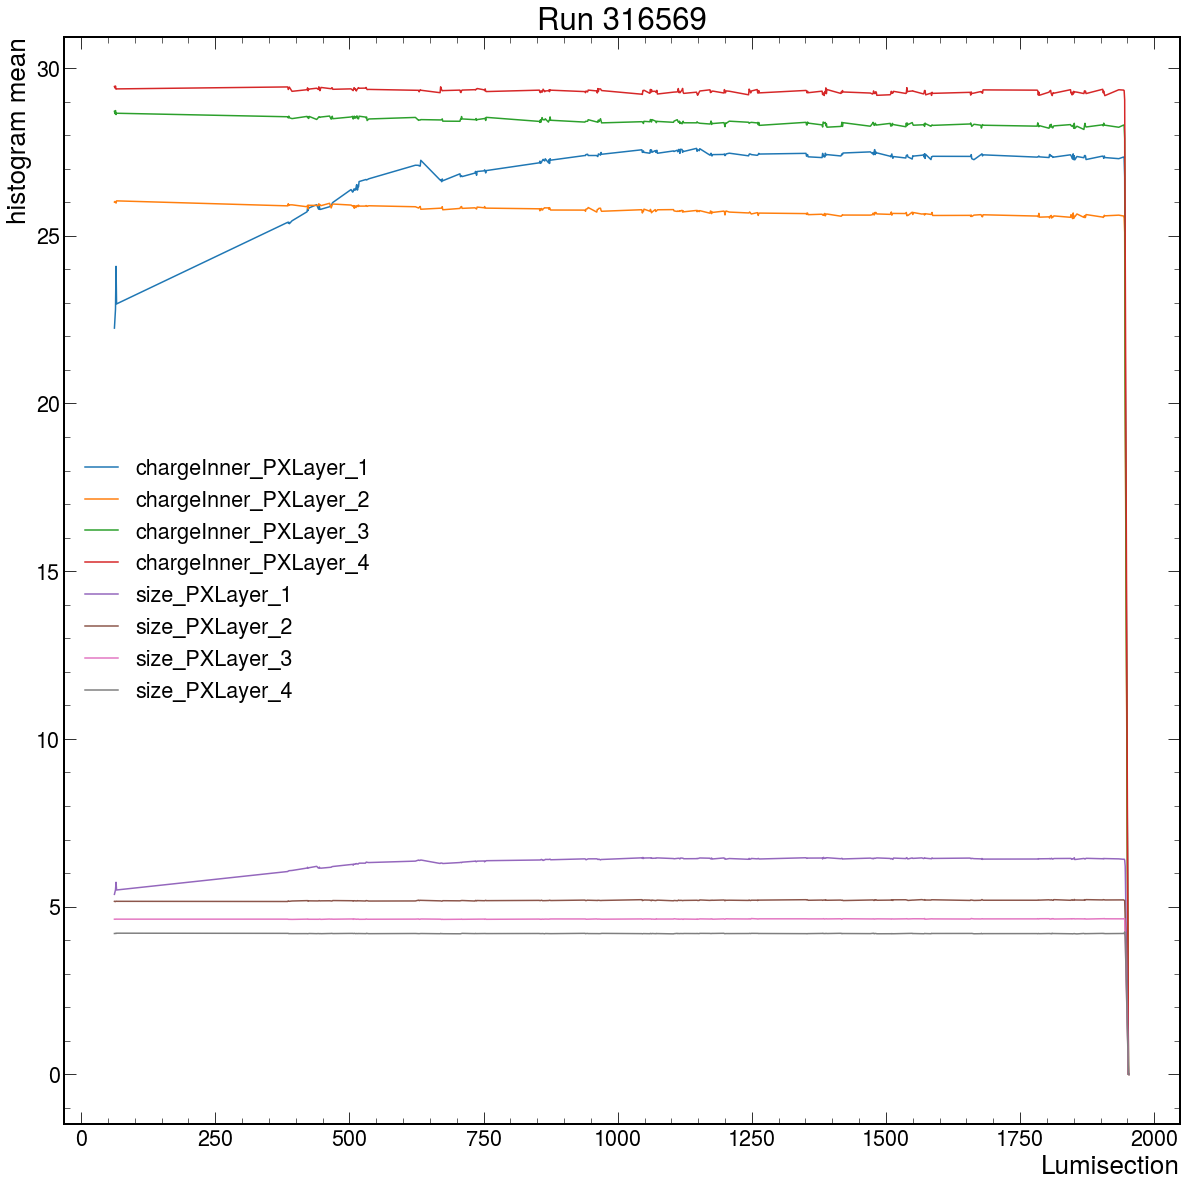

In [16]:
plt.subplots(figsize=(20,20))
plt.plot(mean,label=mean.columns)
plt.ylabel('histogram mean')
plt.xlabel('Lumisection')
plt.legend()
plt.title('Run 316569')